# **micrograd basics**

In [461]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Defining a function to implement

In [462]:
def f(x):
    return 3*x**2 - 4*x + 5

In [463]:
f(3.0)

20.0

In [464]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
(xs,ys)

(array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
        -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
        -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
         1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
         4.  ,  4.25,  4.5 ,  4.75]),
 array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
         55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
         25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
          7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
          4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
         13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
         37.    ,  42.1875,  47.75  ,  53.6875]))

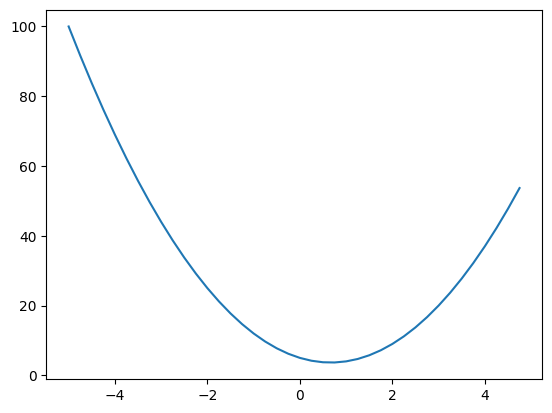

In [465]:
plt.plot(xs,ys)

## Implementing Derivative (A Single Neuron Influence)

- 3x^2 - 4x + 5 -> 6x - 4
- at x = 3 -> 6(3)- 4 = 18 - 4 = 14

In [466]:
# Here node y is connected to previous layer node x
h = 0.000000001
x = 3.0
d = (f(x+h)-f(x))/h
d
(f(x),f(x+h),d)

(20.0, 20.000000014, 14.000001158365194)

- Finding where Slope/Derivative is 0

- 6x - 4 = 0
- x = 4/6 = 2/3 

In [467]:
h = 0.0000001
x = 2/3
derivative = (f(x+h)-f(x))/h
derivative

2.9753977059954195e-07

## Multivariable Derivative ( Many Neuron Influence)
One node connected to many previous nodes

In [468]:
# Here Node d, is connected to previous layer nodes a,b and c
a = 2.0
b = -3.0
c = 10.0
d = a*b+c
print(d)

4.0


#### Calculating Derivative wrt A

In [469]:
h = 0.0001

# input values
a = 2.0
b = -3.0
c = 10.0

#output calculation
d1 = a*b+c

#with respect to a
a += h
dA = a*b+c #went down

slopeA = (dA-d1)/h #by how much it went down

print(f"d1 : ",d1,"\nd2 : ",dA,"\nslope : ",slopeA)

d1 :  4.0 
d2 :  3.999699999999999 
slope :  -3.000000000010772


- By differentiating with respect to a
- d/da = b
- Expect slope or derivative to be just b
- with is exactly as expected to be b which is -3.0 in this case

#### Calculating Derivative wrt B

In [470]:
h = 0.0001

# input values
a = 2.0
b = -3.0
c = 10.0

#output calculation
d1 = a*b+c

#with respect to b
b += h
dB = a*b+c

slopeB = (dB-d1)/h #by how much it changed

print(f"d1 : ",d1,"\nd2 : ",dB,"\nslope : ",slopeB)

d1 :  4.0 
d2 :  4.0002 
slope :  2.0000000000042206


- By differentiating with respect to b
- d/db = a
- Expect slope or derivative to be just a
- with is exactly as expected to be a which is +2.0 in this case

#### Calculating Derivative wrt C

In [471]:
h = 0.0001

# input values
a = 2.0
b = -3.0
c = 10.0

#output calculation
d1 = a*b+c

#with respect to c
c += h
dC = a*b+c

slopeC = (dC-d1)/h #by how much it changed

print(f"d1 : ",d1,"\nd2 : ",dC,"\nslope : ",slopeC)

d1 :  4.0 
d2 :  4.0001 
slope :  0.9999999999976694


- By differentiating with respect to c
- d/dc = 1
- Expect slope or derivative to be just 1

# Building DAG(Directed Acyclic Graph Object)

## Image of the DAG as a Multi Layer Perceptron(MLP)
![Basic DAG as a MLP](Basic_DAG-MLP.png)

#### Structure Explanation
- Need to store scalar value -> so adding data
- Need to store which nodes point -> so children (Only one side direction due to directed graph)
- Need to know what operation they performed
```text
      (+)
     /   \
   (*)    c
  /   \
 a     b
 ```

In [472]:
class Value:

    def __init__(self,data,_children = (), _op = '',label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None #Extra Function for Auto Grad -> ignore for now -> refer to docs there
        self._prev = set(_children) #Just for efficiency
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data})"

    #Adding Operations allowed by micrograd
    
    def __add__(self,otherVar):
        output = Value(self.data + otherVar.data, (self,otherVar),'+')

        #Extra Function for Grad -> ignore for now -> refer to docs there
        def _backward():
            self.grad = 1.0 * output.grad
            otherVar.grad = 1.0 * output.grad
        output._backward = _backward

        return output

    def __mul__(self,otherVar):
        output = Value(self.data * otherVar.data,(self,otherVar),'*')

        #Extra Function for Grad -> ignore for now -> refer to docs there
        def _backward():
            self.grad = otherVar.data * output.grad
            otherVar.grad = self.data * output.grad  
        output._backward = _backward

        return output

    #Function for Perceptron -> ignore for now
    def tanh(self):
        x = self.data
        t = ((math.exp(2*x)-1)/(math.exp(2*x)+1))
        output = Value(t,(self,),'tanh')
        
        #Extra Function for Grad -> ignore for now -> refer to docs there
        def _backward():
            self.grad = (1 - (t**2)) * output.grad
        output._backward = _backward

        return output

    #Extra Function for Auto Grad -> ignore for now -> refer to docs there
    def backward(self):
        self.grad = 1.0
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        for node in reversed(topo):
            node._backward()

In [473]:
x = Value(2.0,label = 'x')
x

Value(data = 2.0)

In [474]:
y = Value(-3.0,label = 'y')
y

Value(data = -3.0)

In [475]:
x + y

Value(data = -1.0)

In [476]:
x * y

Value(data = -6.0)

In [477]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b
e.label = 'e'
d = e+c
d.label = 'd'
f = Value(-2.0, label = 'f')
L = d*f
L.label = 'L'
#Internal Python Call -> 
#(a.__mul__(b)).__add__(c)
L

Value(data = -8.0)

In [478]:
L._prev

{Value(data = -2.0), Value(data = 4.0)}

In [479]:
L._op

'*'

### Visualizing the DAG as a MLP - as shown in the image above

In [528]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data,n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

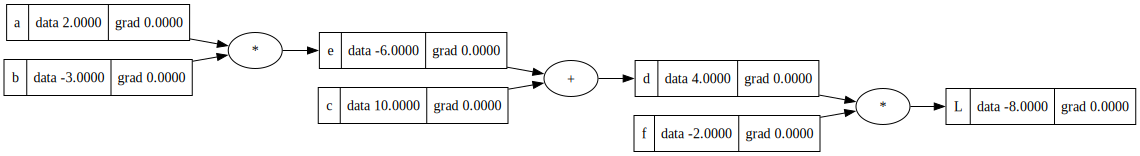

In [481]:
draw_dot(L)

## Implementing Back Propagation

### Filling initial gradient values by manual calculation

#### Manual Calculation

L = d * f

**dL/dd = f**

= (f(x+h)-f(x))/h

= ((d+h)*f)-d*f)/h

= (d*f + h*f - d*f)/h

= (h*f)/h

= f

Similary, **dL/df = d**

dL/dL is obviously 1.0

In [482]:
L.grad = 1.0
f.grad = 4.0 #d.data
d.grad = -2.0 #f.data

In [483]:
def understand():

    h = 0.00001
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2.0+h, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L2 = L.data

    print((L2-L1)/h)

understand()

6.000000000128124


### Main Backpropagation using Chain Rule Calculus

**dL/dc = ?**

dL/dc = 

dL/dd * dd/dc 

-> dL/dd = f = -2.0

-> dd/dc = 1 -> d = e+c

So, dL/dc = -2.0 * 1.0 = -2.0

In [484]:
#Manual Verification

def understand():

    h = 0.00001
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0+h, label = 'c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L2 = L.data

    print((L2-L1)/h)

understand()

-1.9999999999242843


- dL/de  = (dL/dd) * (dL/de) = -2.0 * 1.0 = -2.0

### Similary we can calculate and do for a and b
- dL/da = (dL/dd) * (dd/de) * (de/da)
- e = a * b
- de/da = b
- Similary de/db = a
  
- dL/da = (dL/dd) * (dd/de) * (de/da) = -2.0 * 1.0 * -3.0 = 6.0
- dL/db = (dL/dd) * (dd/de) * (de/db) = -2.0 * 1.0 * 2.0 = -4.0

### Filling initial gradient values by manual calculation

In [485]:
c.grad = -2.0
e.grad = -2.0
a.grad = 6.0
b.grad = -4.0

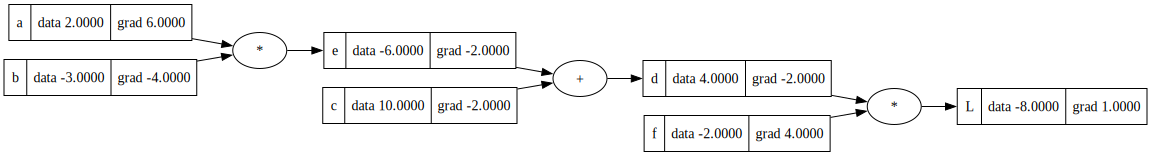

In [486]:
draw_dot(L)

## Intuition behind a single optimization/backprop step

#### Suppose we want to increase the value/data of L
- We can nudge(change by a small value) the values/data of our leaf node
- **Why only leaf nodes?**
- Because those are the nodes that we have control over
- The other nodes such as e and d, get changed by the changes in our leaf nodes
- Suppose e, it is influenced by a & b, as e = a*b,
- So a change in a or b, reflects a change in e
- Thus we can change the value of only our leaf nodes, to see a change in L

### But nudge by what value?
- Well by a small value of the gradient, because if we change it by that,
- We are pushing e,then d, and then finally L
- to the next point in their slope

**In a simple way**
- Gradient tells us that  a small change in i/p will cause what change in the output
- So if we want to increase the value of o/p in this case L
- we nudge this input in the direction of that gradient
- but by a small amount, because we are only trying to reach close to the value we want to reach,
- not always keep overshooting or undershooting it, by causing a large change
- So a small change in a, suppose by 0.006(gradient*0.001) will have an incremental change in L, as directly proportional
- Conversely, a small change in b, suppose by -0.004(gradient*0.001) will have an incremental change in L, as inversely proportional
- **This can be verified by plotting slopes of**
  - **a wrt L**
  - **b wrt L**

In [487]:
xs = np.arange(-6,6,0.25)
ys = (((xs*b.data)+c.data)*f.data) #Expression for L
(xs,ys)

(array([-6.  , -5.75, -5.5 , -5.25, -5.  , -4.75, -4.5 , -4.25, -4.  ,
        -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  , -1.75,
        -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,
         0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,
         3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,  5.  ,
         5.25,  5.5 ,  5.75]),
 array([-56. , -54.5, -53. , -51.5, -50. , -48.5, -47. , -45.5, -44. ,
        -42.5, -41. , -39.5, -38. , -36.5, -35. , -33.5, -32. , -30.5,
        -29. , -27.5, -26. , -24.5, -23. , -21.5, -20. , -18.5, -17. ,
        -15.5, -14. , -12.5, -11. ,  -9.5,  -8. ,  -6.5,  -5. ,  -3.5,
         -2. ,  -0.5,   1. ,   2.5,   4. ,   5.5,   7. ,   8.5,  10. ,
         11.5,  13. ,  14.5]))

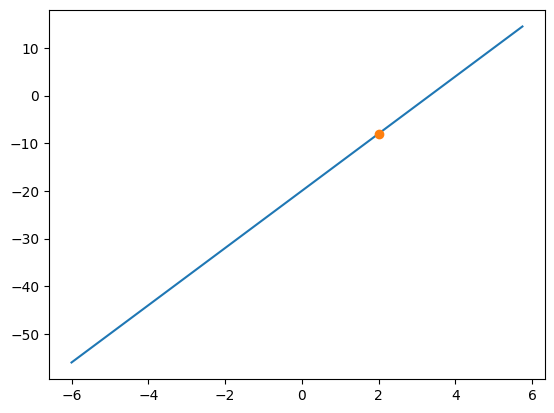

In [488]:
plt.plot(xs,ys)
plt.plot(a.data,L.data,marker='o')

- Thus a positive change in a with respect to it's gradient, will cause L to increase,
- **Interseting point - the slope of the line is a's gradient**
- Let's check the converse with b, we expect a line with a negative slop, that corresponding to it's gradient

In [489]:
slopes = np.diff(ys) / np.diff(xs) #By slope formula (y2-y1)/(x2-x1)
print(slopes)

[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]


In [490]:
xs = np.arange(-6,6,0.25)
ys = (((a.data*xs)+c.data)*f.data) #Expression for L
(xs,ys)

(array([-6.  , -5.75, -5.5 , -5.25, -5.  , -4.75, -4.5 , -4.25, -4.  ,
        -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  , -1.75,
        -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,
         0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,
         3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,  5.  ,
         5.25,  5.5 ,  5.75]),
 array([  4.,   3.,   2.,   1.,  -0.,  -1.,  -2.,  -3.,  -4.,  -5.,  -6.,
         -7.,  -8.,  -9., -10., -11., -12., -13., -14., -15., -16., -17.,
        -18., -19., -20., -21., -22., -23., -24., -25., -26., -27., -28.,
        -29., -30., -31., -32., -33., -34., -35., -36., -37., -38., -39.,
        -40., -41., -42., -43.]))

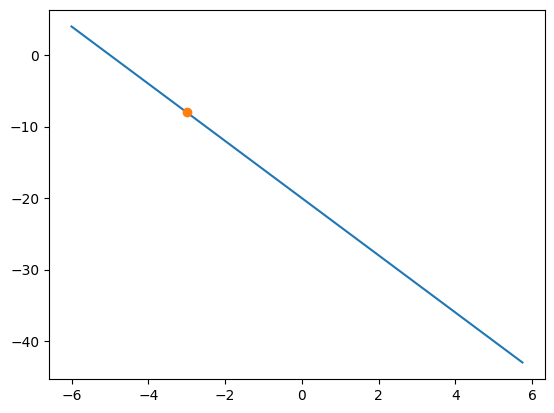

In [491]:
plt.plot(xs,ys)
plt.plot(b.data,L.data,marker='o')

- Thus a negative change in b with respect to it's gradient, will cause L to increase
- - **Interseting point - the slope of the line is b's gradient**

In [492]:
slopes = np.diff(ys) / np.diff(xs) #By slope formula (y2-y1)/(x2-x1)
print(slopes)

[-4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.]


## Implementing a single optimization/backprop step

In [493]:
#Performin Backward Pass/Backprop
a.data += 0.001 * a.grad
b.data += 0.001 * b.grad
c.data += 0.001 * c.grad
f.data += 0.001 * f.grad

- The above just changed the values of the leaf node
- To check the corresponding change in o/p in this case L
- We have to do a forward pass

In [494]:
#Performing Forward Pass
e = a*b
d = e+c
L = d*f

print(L.data)

-7.928064095999999


# **Building a Perceptron/Neuron**

- Using a non linear squash-ification function -> tanh

In [495]:
#inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

#weights w1,w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

#Bias of the Perceptron/Neuron
b = Value(6.8813735870195432, label = 'b')  #Compilcated Bias value to get nice clean numbers while backprop

#Neuron Calculation
# x1 * w1 + x2 * w2 + b

x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

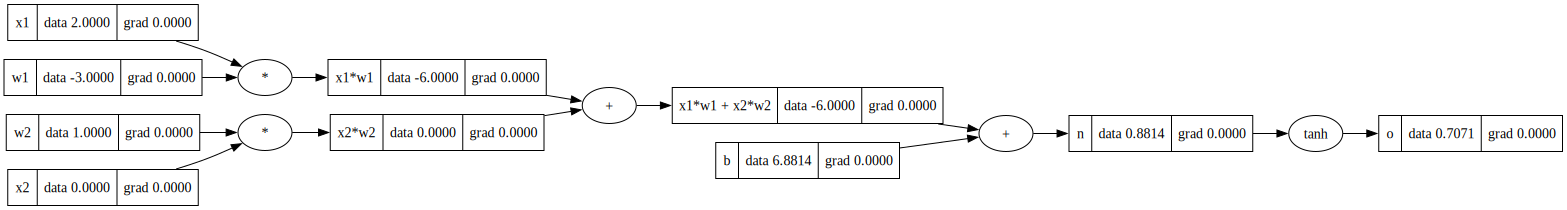

In [496]:
draw_dot(o)

In [497]:
o.grad = 1.0

### Calculating Gradients

In [498]:
# o = tanh(n)
# do/dn = 1 - tanh(n)**2
# do/dn = 1 - o**2

n.grad = 1 - (o.data**2)
print(n.grad)

0.4999999999999999


##### Calculating grad for b
- do/db = do/dn * dn/db
- dn/db = 1
- do/db = do/dn*1 = 1-o**2 = 0.5

In [499]:
b.grad = 0.5

##### Calculating grad for x1*w1 + x2*w2
- for short let's call it xwxw
- do/dxwxw = do/dn * dn/dxwxw
- dn/dxwxw = 1
- do/dxwxw = do/dn*1 = 1-o**2 = 0.5

In [500]:
x1w1x2w2.grad = 0.5

##### Calculating grad for x1*w1
- for short let's call it x1w1
- do/dx1w1 = do/dn * dn/dxwxw * dxwxw/dx1w1
- dn/dn * dn/dxwxw = do/dxwxw = 0.5
- dxwxw/dx1w1 = 1
- do/dx1w1 = 0.5 * 1 = 0.5

In [501]:
x1w1.grad = 0.5

##### Calculating grad for x2*w2
- for short let's call it x2w2
- do/dx2w2 = do/dn * dn/dxwxw * dxwxw/dx2w2
- dn/dn * dn/dxwxw = do/dxwxw = 0.5
- dxwxw/dx2w2 = 1
- do/dx2w2 = 0.5 * 1 = 0.5

In [502]:
x2w2.grad = 0.5

##### Calculating grad for x1
- do/dx1 = do/dn * dn/dxwxw * dxwxw/dx1w1 * dx1w1/dx1
- dn/dn * dn/dxwxw * dxwxw/dx1w1 = do/dx1w1 = 0.5
- dx1w1/dx1 = w1
- do/dx1 = 0.5 * w1 = 0.5 * -3.0 = -1.5

In [503]:
x1.grad = -1.5

##### Calculating grad for w1
- do/dw1 = do/dn * dn/dxwxw * dxwxw/dx1w1 * dx1w1/dw1
- dn/dn * dn/dxwxw * dxwxw/dx1w1 = do/dx1w1 = 0.5
- dx1w1/dw1 = x1
- do/dw1 = 0.5 * x1 = 0.5 * 2.0 = 1.0

In [504]:
w1.grad = 1.0

##### Calculating grad for x2
- do/dx2 = do/dn * dn/dxwxw * dxwxw/dx2w2 * dx1w1/dx2
- dn/dn * dn/dxwxw * dxwxw/dx2w2 = do/dx2w2 = 0.5
- dx2w2/dx2 = w2
- do/dx2 = 0.5 * w2 = 0.5 * 1.0 = 0.5

In [505]:
x2.grad = 0.5

##### Calculating grad for w2
- do/dw2 = do/dn * dn/dxwxw * dxwxw/dx2w2 * dx1w1/dw2
- dn/dn * dn/dxwxw * dxwxw/dx2w2 = do/dx2w2 = 0.5
- dx2w2/dw2 = x2
- do/dw2 = 0.5 * x2 = 0.5 * 0.0 = 0.0

In [506]:
w2.grad = 0.0

## Implementing Grad engine

##### Now, that we have a feel for back prop works,we can modify our value class by adding a backward function to it

#### Formula on how to autograd : 
- **Child.grad = Local Backprop/Derivative * Global Backprop/Derivative**
- *Global Backprop/Derivative* is always the parent so output as per Value Class
- *Local Backprop/Derivative* varies depending on operation
- For *+* -> 1.0
- For _*_ -> otherVariable.data

  z = x * y
  - dz/dx = y
  - dz/dy = x
- For *tanh* -> 1 - (tanh(input))**2

### Functions added to Value Class
- _backward() function in add(), mul() and tanh() method
- Assign value to _backward once auto grad was implemented, to calculate grad as nn is built

In [507]:
#inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

#weights w1,w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

#Bias of the Perceptron/Neuron
b = Value(6.8813735870195432, label = 'b')  #Compilcated Bias value to get nice clean numbers while backprop

#Neuron Calculation
# x1 * w1 + x2 * w2 + b

x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

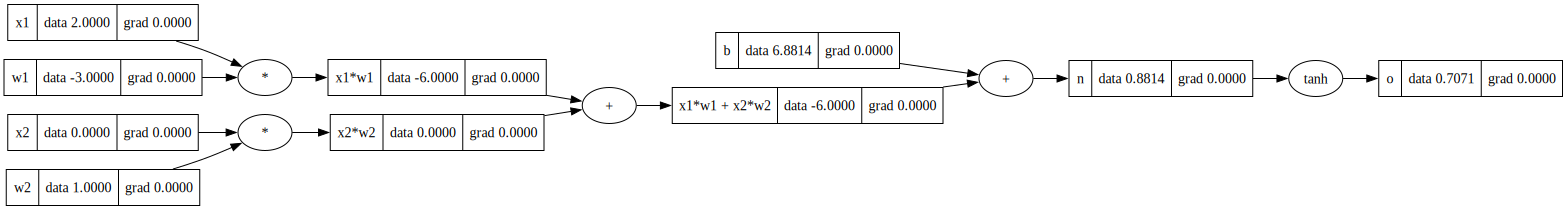

In [508]:
draw_dot(o)

In [509]:
o.grad = 1.0

In [510]:
o._backward()

### How does _backward() work?
- When we are at let's say at node n, we call the tanh function to build it further,
- The node n, instead of having the _backward() function being stored as None,
- saves it as the new function defined in the tanh() method
- This is then later called by it's parent or output(as per Value class)
- as per this, the gradient of the self, which in this case is the child or node n is set,
- How?
- based on the gradient of the output/parent -> also referred to as the global backprop/derivative
- and some local backprop/derivative ( Different formulas for different operations)
- Thus, this does backprop for the child node, i.e. fill/update it's gradient value when,
- the parent node backward method is called

In [511]:
n._backward()

In [512]:
b._backward() #Nothing happens, set to None for leaf nodes in Value class

In [513]:
x1w1x2w2._backward()

In [514]:
x1w1._backward()

In [515]:
x2w2._backward()

## Implementing Auto Grad engine

#### Now the final/last Node backward should auto call all the previous backward calls

#### Thus we can perform a topological sort and call the backward pass accordingly

In [516]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data = 6.881373587019543),
 Value(data = 0.0),
 Value(data = 1.0),
 Value(data = 0.0),
 Value(data = -3.0),
 Value(data = 2.0),
 Value(data = -6.0),
 Value(data = -6.0),
 Value(data = 0.8813735870195432),
 Value(data = 0.7071067811865476)]

#### Now all this functionality can be abstracted and encapsulated in the Value Class

In [517]:
#inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

#weights w1,w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

#Bias of the Perceptron/Neuron
b = Value(6.8813735870195432, label = 'b')  #Compilcated Bias value to get nice clean numbers while backprop

#Neuron Calculation
# x1 * w1 + x2 * w2 + b

x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

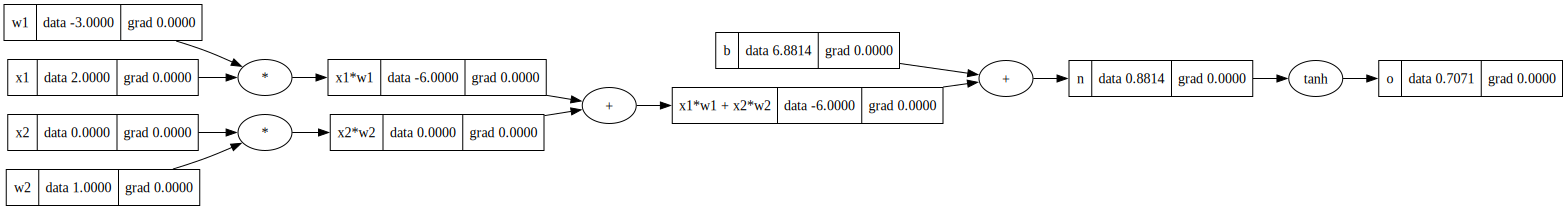

In [518]:
draw_dot(o)

In [519]:
o.backward()

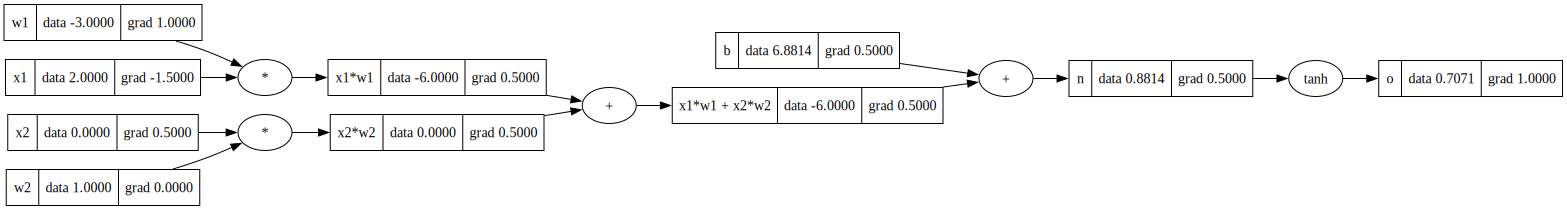

In [520]:
draw_dot(o)

#### Bug Identification
- Anytime a node is used more than once it gradient comes out wrong

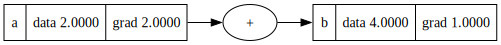

In [524]:
#Example 1
a = Value(2.0, label = 'a')
b= a+a; b.label = 'b'
b.backward()
draw_dot(b)

#### The gradient of a should be 2 not 1
- b = 2a , so
- db/da = 2.0
- Issue we update it one at a time
- First set to 1.0 for 1st a, then again 1.0 for 2nd a

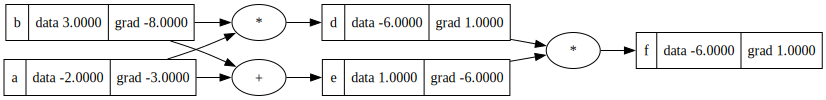

In [526]:
#Example 2
a = Value(-2.0, label = 'a')
b= Value(3.0, label = 'b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'
f.backward()
draw_dot(f)

#### The gradient of a should be combined of both d and e, not just of whichever sets it last
- As per multivariable calculus, these gradient values add up,
- So rather than just assigning them as =, we can assign them as +=

In [523]:
class Value:

    def __init__(self,data,_children = (), _op = '',label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None #Extra Function for Auto Grad -> ignore for now -> refer to docs there
        self._prev = set(_children) #Just for efficiency
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data})"

    #Adding Operations allowed by micrograd
    
    def __add__(self,otherVar):
        output = Value(self.data + otherVar.data, (self,otherVar),'+')

        #Extra Function for Grad -> ignore for now -> refer to docs there
        def _backward():
            self.grad += 1.0 * output.grad
            otherVar.grad += 1.0 * output.grad
        output._backward = _backward

        return output

    def __mul__(self,otherVar):
        output = Value(self.data * otherVar.data,(self,otherVar),'*')

        #Extra Function for Grad -> ignore for now -> refer to docs there
        def _backward():
            self.grad += otherVar.data * output.grad
            otherVar.grad += self.data * output.grad  
        output._backward = _backward

        return output

    #Function for Perceptron -> ignore for now
    def tanh(self):
        x = self.data
        t = ((math.exp(2*x)-1)/(math.exp(2*x)+1))
        output = Value(t,(self,),'tanh')
        
        #Extra Function for Grad -> ignore for now -> refer to docs there
        def _backward():
            self.grad += (1 - (t**2)) * output.grad
        output._backward = _backward

        return output

    #Extra Function for Auto Grad -> ignore for now -> refer to docs there
    def backward(self):
        self.grad = 1.0
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        for node in reversed(topo):
            node._backward()

#### Testing with the Examples

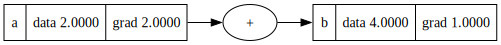

In [525]:
#Example 1
a = Value(2.0, label = 'a')
b= a+a; b.label = 'b'
b.backward()
draw_dot(b)

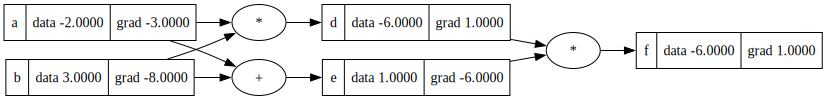

In [527]:
#Example 2
a = Value(-2.0, label = 'a')
b= Value(3.0, label = 'b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'
f.backward()
draw_dot(f)